In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression

In [2]:
class LinearRegression:
    def __init__(self, X, y):
        r,c = X.shape
        inital_ones = np.ones([r,1]) #bias term
        self.X = np.concatenate((inital_ones,X),axis=1)
        self.y = y
        self.theta = np.zeros(self.X.shape[1]) # +1 for the bias term
    
    def predictions(self):
        return np.matmul(self.X,self.theta)
        
    def cost_function(self):
        return 0.5 * ((self.predictions()-self.y)**2).sum()
    
    def cost_derivative(self):
        return np.matmul(self.X.T, (self.predictions()- self.y))
     
    def gradient_descent_step(self,learning_rate):
        self.theta = self.theta  - (learning_rate * self.cost_derivative())
    
    def fit_by_gradient_descent(self,learning_rate,epochs):
        for i in range(epochs):
            self.gradient_descent_step(learning_rate)
            
    def fit_by_normal_equation(self):
        self.theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(self.X.T,self.X)),self.X.T),self.y)

### Test on simple dataset

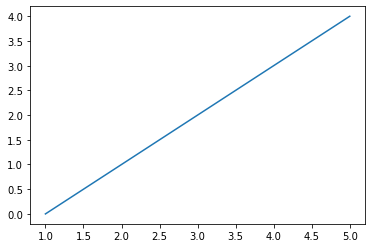

In [3]:
X = np.array([[1],[2],[3],[4],[5]])
y = np.array([0,1,2,3,4])
plt.plot(X,y)

In [4]:
linear = LinearRegression(X,y)

In [5]:
linear.cost_function()

15.0

In [6]:
linear.cost_derivative()

array([-10., -40.])

In [7]:
linear.fit_by_gradient_descent(0.01,1000)

In [8]:
linear.theta

array([-0.99975585,  0.99993238])

In [9]:
linear = LinearRegression(X,y)
linear.fit_by_normal_equation()

In [10]:
linear.theta

array([-1.,  1.])